b설문지 데이터를 이용한 요인분석
(Q1 ~ Q10) 방사선 방어행위에 대한 질문, Q11은 업무 만족도에 대한 질문인 설문지

In [79]:
import pandas as pd
from sklearn.datasets import load_boston
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [80]:
data = pd.read_csv('설문지.csv')

In [81]:
data.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11
0,5.0,5.0,4.0,4.0,1.0,5.0,5.0,1.0,1.0,1.0,5.0
1,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0
2,4.0,4.0,4.0,4.0,2.0,4.0,5.0,5.0,4.0,4.0,4.0
3,5.0,5.0,5.0,5.0,1.0,5.0,4.0,5.0,5.0,5.0,5.0
4,3.0,3.0,3.0,3.0,3.0,4.0,5.0,5.0,5.0,3.0,4.0


In [82]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(data)

## 1. Q1 ~ Q10에 대해 신뢰도 값 구하기

In [83]:
def CronbachAlpha(itemscores):
    # cols are items, rows are observations
    #itemscores = np.asarray(itemscores)
    itemvars = itemscores.var(axis=0, ddof=1)
    tscores = itemscores.sum(axis=1)
    nitems = len(itemscores.columns)

    return (nitems / (nitems-1)) * (1 - (itemvars.sum() / tscores.var(ddof=1)))

In [84]:
data.iloc[:, :-1]

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
0,5.0,5.0,4.0,4.0,1.0,5.0,5.0,1.0,1.0,1.0
1,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0
2,4.0,4.0,4.0,4.0,2.0,4.0,5.0,5.0,4.0,4.0
3,5.0,5.0,5.0,5.0,1.0,5.0,4.0,5.0,5.0,5.0
4,3.0,3.0,3.0,3.0,3.0,4.0,5.0,5.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...
145,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,4.0,1.0
146,2.0,5.0,5.0,5.0,2.0,5.0,5.0,5.0,1.0,1.0
147,2.0,2.0,3.0,3.0,2.0,3.0,5.0,5.0,5.0,2.0
148,1.0,1.0,4.0,4.0,1.0,3.0,4.0,5.0,5.0,5.0


In [85]:
CronbachAlpha(data.iloc[:, :-1])

0.8762714858685039

## 2. 위 설문지 데이터가 요인분석에 적합한지 알아보기

- Bartlett or Kaiser-Meyer-Olkin Test

In [86]:
chi_square_value,p_value = calculate_bartlett_sphericity(scaled_df)
chi_square_value, p_value

(6014.948673523576, 0.0)

bartlet test 결과 유의확률이 0에 근사하므로 데이터가 요인분석에 적합하다고 할 수 있다.

#### KMO 검정은 변수가 3개 이상이어야 한다.

In [87]:
kmo_all,kmo_model = calculate_kmo(scaled_df)
kmo_model

/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/factor_analyzer/utils.py:248: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


0.7727378548998217

값이 0.6미만이면 부적절이고 0.8이상이면 우수한 데이터로 해당 데이터는 0.8에 가깝기 때문에 비교적 적합하다고 할 수 있다.

## 3. 적절한 요인개수 찾고 해석하기

- 요인들이 서로 상관되지 않도록하기 위해 직교회전 사용

In [88]:
fa = FactorAnalyzer(n_factors = 4, rotation = 'varimax')
fa.fit(scaled_df)
ev, v = fa.get_eigenvalues()
ev

array([5.50820802e+00, 1.73627396e+00, 1.24487512e+00, 7.96087698e-01,
       4.43328955e-01, 4.12248827e-01, 3.65736358e-01, 2.06648433e-01,
       1.80269277e-01, 1.06323351e-01, 4.85722573e-17])

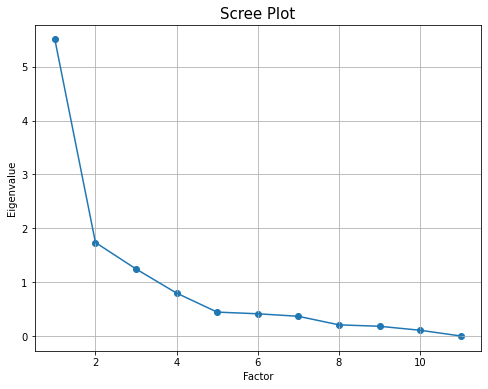

In [89]:
plt.figure(figsize = (8,6))
plt.scatter(range(1,scaled_df.shape[1]+1),ev)
plt.plot(range(1,scaled_df.shape[1]+1),ev)
plt.title("Scree Plot",fontsize = 15)
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

요인개수가 5가 적합한 것으로 나타났다. 

In [90]:
fa = FactorAnalyzer(n_factors = 5, rotation = 'promax')
fa.fit(scaled_df)
ev, v = fa.get_eigenvalues()
ev

array([5.50820802e+00, 1.73627396e+00, 1.24487512e+00, 7.96087698e-01,
       4.43328955e-01, 4.12248827e-01, 3.65736358e-01, 2.06648433e-01,
       1.80269277e-01, 1.06323351e-01, 4.85722573e-17])

In [91]:
result = pd.DataFrame(fa.loadings_,index = data.columns)

In [92]:
result = round(result,2)

In [93]:
result

,0,1,2,3,4
Q1,0.49,0.00,0.05,-0.15,0.70
Q2,0.75,0.09,-0.12,0.02,0.20
Q3,0.97,-0.09,0.01,0.03,0.03
Q4,1.01,-0.11,-0.03,0.10,-0.06
Q5,0.07,0.36,0.01,0.32,0.08
Q6,-0.08,1.06,-0.06,0.00,0.00
Q7,0.31,0.40,0.16,-0.09,-0.07
Q8,0.03,0.06,1.00,-0.15,-0.05
Q9,-0.09,-0.13,0.71,0.21,0.10
Q10,0.05,-0.00,0.01,1.02,-0.13


In [94]:
print('{} 변수의 분산의 {}%는 4개의 공통요인에 의한 것이다'.format(data.columns[0],round((sum(fa.loadings_[0]**2) * 100),2)))
print("나머지 {}%는 {}의 특수요인에 의한 것이다".format(round(fa.get_uniquenesses()[0] * 100,2),data.columns[0]))

Q1 변수의 분산의 75.36%는 4개의 공통요인에 의한 것이다
나머지 24.64%는 Q1의 특수요인에 의한 것이다


In [95]:
fa_df = pd.DataFrame(fa.get_factor_variance())
fa_df.index = ['SS Loadings','Proportion Var','Cumulative Var']
fa_df

,0,1,2,3,4
SS Loadings,2.889310,2.581566,1.558916,1.260039,0.576059
Proportion Var,0.262665,0.234688,0.141720,0.114549,0.052369
Cumulative Var,0.262665,0.497352,0.639072,0.753621,0.805990


In [96]:
fa.get_uniquenesses() # 0.5 이하이면 유효

array([ 0.24639579,  0.38122177,  0.0449606 , -0.0503318 ,  0.75205177,
       -0.13196326,  0.7045196 , -0.02988447,  0.41509473, -0.06599139,
       -0.13196326])

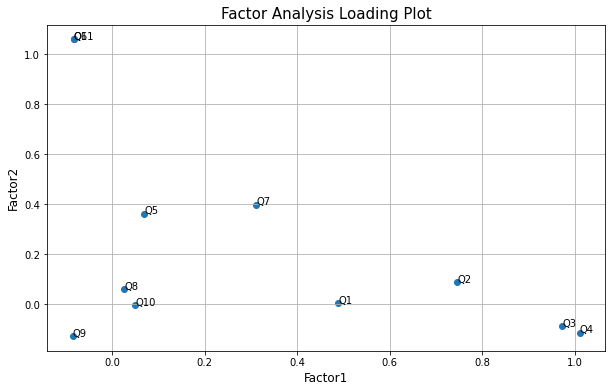

In [97]:
fig,ax = plt.subplots(figsize = (10,6))
plt.title("Factor Analysis Loading Plot", fontsize = 15)
x = fa.loadings_[:,0]
y = fa.loadings_[:,1]
ax.scatter(x,y)
for i, txt in enumerate(data.columns) :
    ax.annotate(txt,(x[i],y[i]),)
    
plt.xlabel("Factor1",fontsize = 12)
plt.ylabel("Factor2",fontsize = 12)
plt.grid()
plt.show()

## 4. 변수들의 분산에 대해 heatmap을 그리고 해석하기

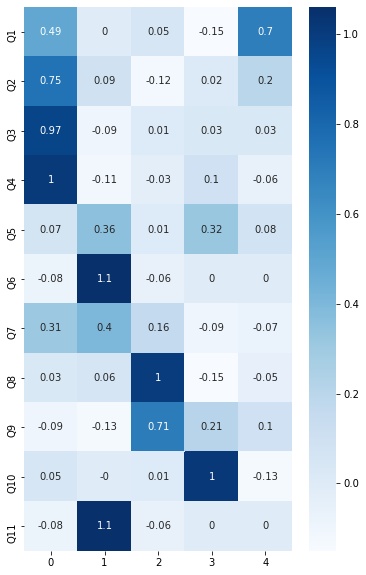

In [98]:
plt.figure(figsize = (6,10))
sns.heatmap(result, cmap = 'Blues', annot = True)
plt.show()

- 1번 요인은 'Q2', 'Q3', 'Q4'에 높은 요인 적재량을 가진다.
- 2번 요인은 'Q5', 'Q6', 'Q11'에 높은 요인 적재량을 가진다.
- 3번 요인은 'Q8', 'Q9'에 높은 요인 적재량을 가진다.
- 4번 요인은 'Q10'에 높은 요인 적재량을 가진다.
- 5번 요인은 'Q1'에 높은 요인 적재량을 가진다.

## 5. 위 요인을 독립변수로 이용하여 Q11 회귀분석 진행하기

In [99]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [100]:
sc_data = pd.DataFrame(scaled_df, columns = data.columns)

In [101]:
sc_data['Q11'] = data['Q11']

In [102]:
model = ols(formula = 'Q11 ~ Q1 + Q2 + Q3 + Q4 + Q5 + Q6 + Q7 + Q8 + Q9 + Q10', data = sc_data)

In [103]:
result = model.fit()

In [104]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Q11   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.192e+29
Date:                Mon, 03 May 2021   Prob (F-statistic):               0.00
Time:                        16:32:31   Log-Likelihood:                 4729.2
No. Observations:                 150   AIC:                            -9436.
Df Residuals:                     139   BIC:                            -9403.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5067   4.17e-16   8.41e+15      0.000       3.507       3.507
Q1          8.812e-16   7.03e-16      1.253      0.212   -5.09e-16    2.27e-15
Q2          1.332e-15   8.49e-16      1.569      0.119   -3.47e-16    3.01e-15
Q3          2.304e-15   1.02e-15      2.254      0.026    2.83e-16    4.32e-15
Q4          3.886e-16    9.5e-16      0.409      0.683   -1.49e-15    2.27e-15
Q5         -2.075e-15   5.81e-16     -3.569      0.000   -3.22e-15   -9.25e-16
Q6             1.1930   6.46e-16   1.85e+15      0.000       1.193       1.193
Q7           2.22e-16   5.59e-16      0.397      0.692   -8.83e-16    1.33e-15
Q8           2.22e-16   6.46e-16      0.344      0.732   -1.06e-15     1.5e-15
Q9          7.772e-16   6.57e-16      1.183      0.239   -5.22e-16    2.08e-15
Q10        -1.943e-15   5.87e-16     -3.307      0.001    -3.1e-15   -7.81e-16
==============================================================================
Omnibus:                       17.596   Durbin-Watson:                   1.591
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.536
Skew:                          -0.708   Prob(JB):                     1.28e-05
Kurtosis:                       4.266   Cond. No.                         6.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import shapiro

In [106]:
durbin_watson(result.resid)

1.591287867187952

2에 가깝기 때문에 오차항이 독립성을 만족한다고 할 수 있다.

In [107]:
shapiro = shapiro(result.resid)
print(f'shapiro 검정결과 검정 값은 {np.round(shapiro[0],4)}이고 p-value는 {np.round(shapiro[1], 4)}이다.')

shapiro 검정결과 검정 값은 0.9618이고 p-value는 0.0004이다.


귀무가설을 채택하고 정규분포를 따른다고 할 수 있다.

/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


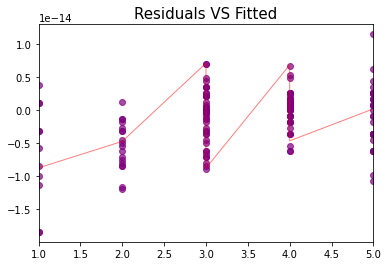

In [108]:
plt.scatter(result.fittedvalues, result.resid, color = 'purple', alpha = .7)
sns.regplot(result.fittedvalues, result.resid,
          scatter=False,
          ci=False,
          lowess=True,
          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.5});
plt.title('Residuals VS Fitted', size = 15)
plt.show()

In [109]:
from scipy.stats import probplot

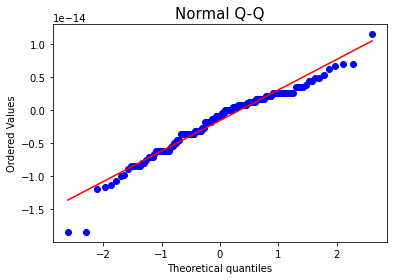

In [110]:
probplot(result.resid, plot = plt)
plt.title('Normal Q-Q', size = 15)
plt.show()

/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


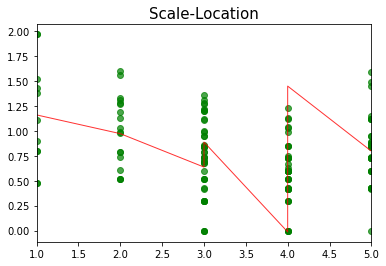

In [111]:
plt.scatter(result.fittedvalues, np.sqrt(np.abs(result.get_influence().resid_studentized_internal)), color = 'green', alpha = .7)
sns.regplot(result.fittedvalues, np.sqrt(np.abs(result.get_influence().resid_studentized_internal)),
          scatter=False,
          ci=False,
          lowess=True,
          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plt.title('Scale-Location', size = 15)
plt.show()

/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


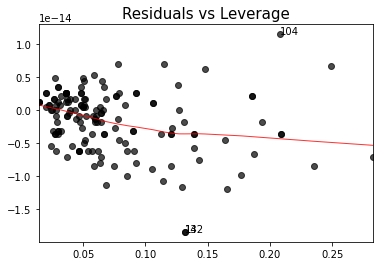

In [112]:
plt.scatter(result.get_influence().hat_matrix_diag, result.resid, color = 'black', alpha = .7)
sns.regplot(result.get_influence().hat_matrix_diag, result.resid,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
leverage_top_3 = np.flip(np.argsort(result.get_influence().cooks_distance[0]), 0)[:3]
for i in leverage_top_3:
    plt.annotate(i, xy=(result.get_influence().hat_matrix_diag[i],
                                 result.resid[i]));
plt.title('Residuals vs Leverage', size = 15)
plt.show()